In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install biopython matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.3 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO

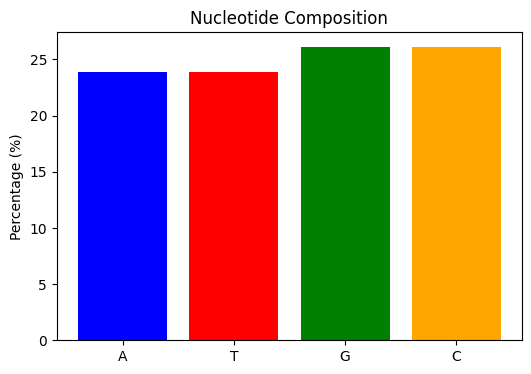

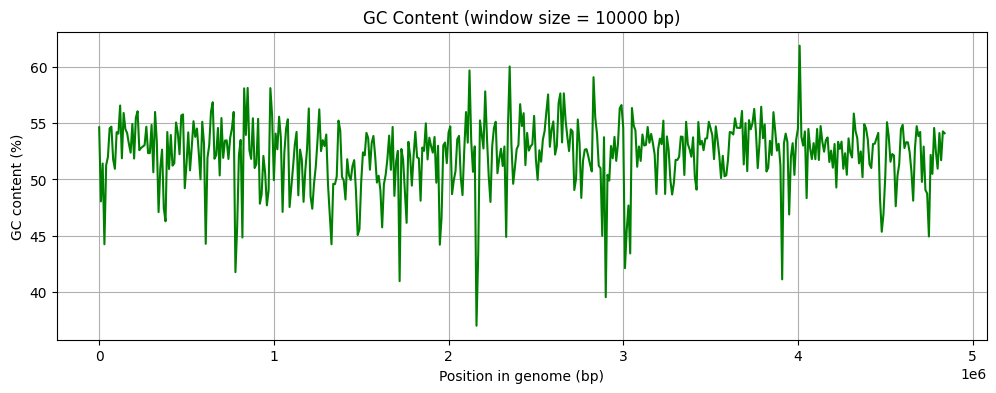

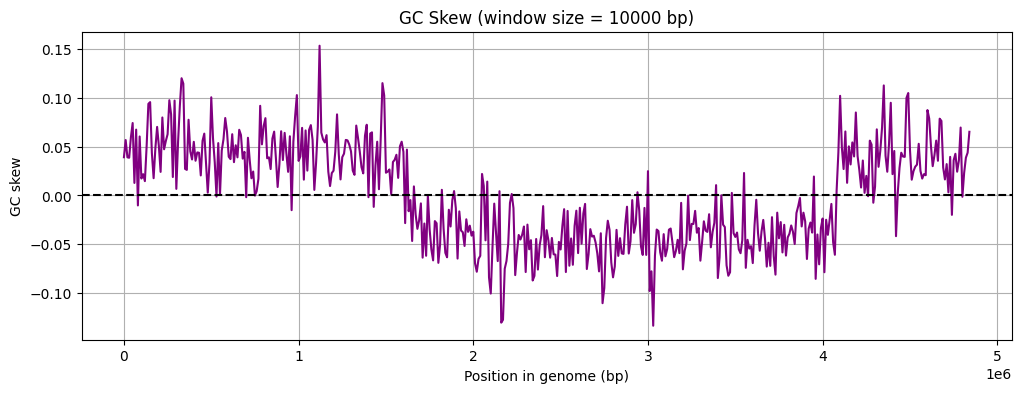

In [ ]:
# === Параметры ===
fasta_file = '/content/sequence_full.fasta'
window_size = 10000  # Размер окна для скользящих расчетов

# === Загрузка последовательности ===
record = SeqIO.read(fasta_file, "fasta")
sequence = str(record.seq).upper()

# === Функция для скользящих окон ===
def sliding_window(seq, window):
    for i in range(0, len(seq) - window + 1, window):
        yield seq[i:i+window], i

# === 1. Процентное содержание нуклеотидов (в целом) ===
nucleotides = ['A', 'T', 'G', 'C']
counts = {nt: sequence.count(nt) for nt in nucleotides}
total = sum(counts.values())
percentages = {nt: count / total * 100 for nt, count in counts.items()}

# Визуализация
plt.figure(figsize=(6, 4))
plt.bar(percentages.keys(), percentages.values(), color=["blue", "red", "green", "orange"])
plt.ylabel('Percentage (%)')
plt.title('Nucleotide Composition')
plt.show()

# === 2. GC-контент по скользящему окну ===
gc_content = []
positions = []

for window_seq, pos in sliding_window(sequence, window_size):
    gc = (window_seq.count('G') + window_seq.count('C')) / len(window_seq) * 100
    gc_content.append(gc)
    positions.append(pos)

# Визуализация
plt.figure(figsize=(12, 4))
plt.plot(positions, gc_content, color='green')
plt.xlabel('Position in genome (bp)')
plt.ylabel('GC content (%)')
plt.title(f'GC Content (window size = {window_size} bp)')
plt.grid()
plt.show()

# === 3. GC-skew по скользящему окну ===
gc_skew = []

for window_seq, pos in sliding_window(sequence, window_size):
    g = window_seq.count('G')
    c = window_seq.count('C')
    skew = (g - c) / (g + c) if (g + c) != 0 else 0
    gc_skew.append(skew)

# Визуализация
plt.figure(figsize=(12, 4))
plt.plot(positions, gc_skew, color='purple')
plt.xlabel('Position in genome (bp)')
plt.ylabel('GC skew')
plt.title(f'GC Skew (window size = {window_size} bp)')
plt.axhline(0, color='black', linestyle='--')
plt.grid()
plt.show()

In [ ]:
len(sequence)

4857450

In [ ]:
percentages

{'A': 23.899453416916284,
 'T': 23.878845896509485,
 'G': 26.10878135647305,
 'C': 26.112919330101185}

In [ ]:
import matplotlib.pyplot as plt

def process_fasta(filename):
    read_lengths = []

    with open(filename, 'r') as file:
        # Пропускаем первые 6 строк (комментарии)
        for _ in range(0):
            next(file)

        seq = ""
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if seq:
                    read_lengths.append(len(seq))
                    seq = ""
            else:
                seq += line
        # Добавим последнюю последовательность
        if seq:
            read_lengths.append(len(seq))

    return read_lengths

def plot_read_lengths(lengths):
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=50, color='skyblue', edgecolor='black')
    plt.title("Распределение длин ридов")
    plt.xlabel("Длина рида")
    plt.ylabel("Количество ридов")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main(filename):
    # Замените на имя вашего файла
    read_lengths = process_fasta(filename)

    if not read_lengths:
        print("Нет считанных ридов.")
        return

    avg_length = sum(read_lengths) / len(read_lengths)
    print(f"Средняя длина рида: {avg_length:.2f}")
    print(sum(list(filter(lambda x: x > 160, read_lengths))))
    print(len(list(filter(lambda x: x > 160, read_lengths))))
    plot_read_lengths(read_lengths)

Средняя длина рида: 107.99
5418950
26335


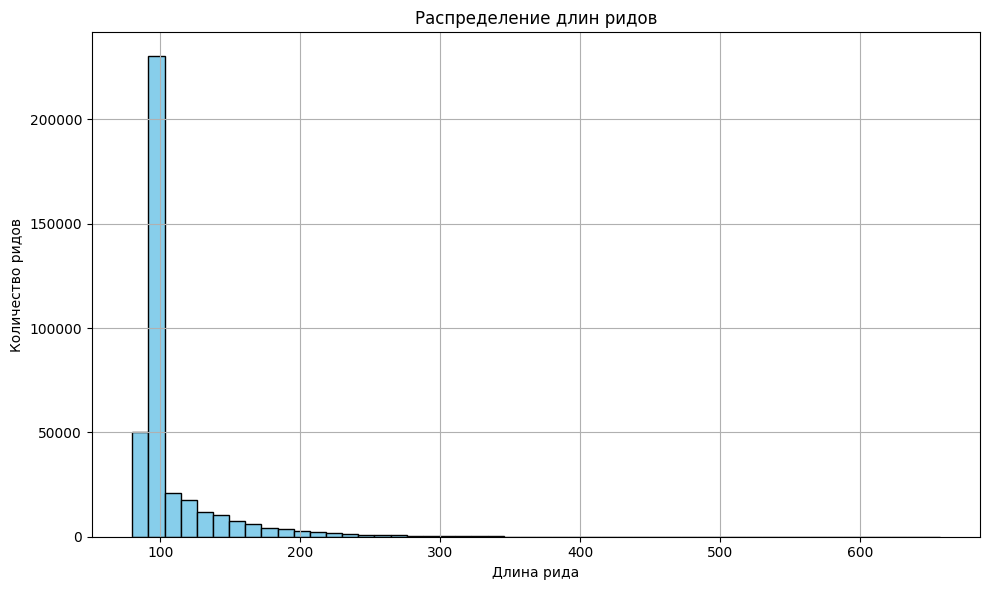

In [ ]:
filename = "/content/assembled_contigs_de_bruijn_full.txt"
main(filename)